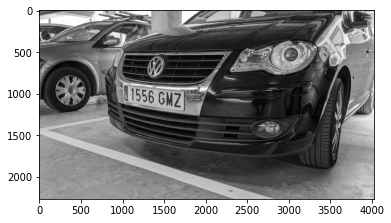

In [158]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
from skimage.segmentation import clear_border

path = 'C:/Users/LENOVO/Documents/uni/4t/psiv/psiv2_matricules/Imatges'
nom_imagenes = os.listdir(path)
imagenes = []
ll_img = []

for titulo in nom_imagenes:
    
    if titulo.endswith('.jpg') or titulo.endswith('.jpeg'):
        img =  cv.imread('Imatges/' + titulo)
        ll_img.append(img)
        img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        imagenes.append( img_gris)
       

#img = cv.imread('Imatges/matricula_28.jpeg')
#img_gris = cv.cvtColor(imagenes[0], cv.COLOR_BGR2GRAY)
plt.imshow(imagenes[0], cmap="gray")

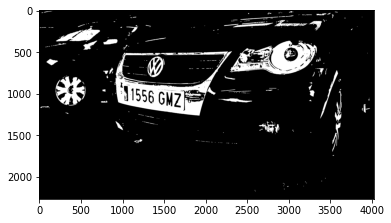

In [159]:

imagenes_edge_removed = []

for imagen in  imagenes:
    
    median = cv.medianBlur(imagen, 3)
    ret, th = cv.threshold(median, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
    kernel = np.ones((5,5), np.uint8)
    opening = cv.morphologyEx(th, cv.MORPH_OPEN, kernel)
    edge_touching_removed = clear_border(opening)
    contours, hierarchy = cv.findContours(edge_touching_removed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    imagenes_edge_removed.append(edge_touching_removed)

#median = cv.medianBlur(img_gris, 3)
#ret, th = cv.threshold(median, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
#kernel = np.ones((5,5), np.uint8)
#opening = cv.morphologyEx(th, cv.MORPH_OPEN, kernel)
#edge_touching_removed = clear_border(opening)
#contours, hierarchy = cv.findContours(edge_touching_removed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

plt.imshow(imagenes_edge_removed[0], cmap="gray")

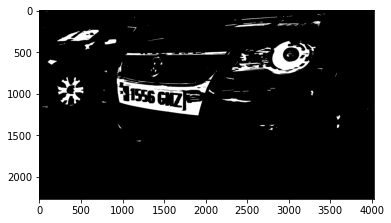

In [160]:
#quitar linias finas elemento que cauan problemas
imagen_opening = []

for imagen in  imagenes_edge_removed:

    median = cv.medianBlur(imagen, 3)
    ret, th = cv.threshold(median, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
    kernel = np.ones((3,3), np.uint8)
    img_erosion = cv.erode(th, kernel, iterations=4)
    opening = cv.morphologyEx(th, cv.MORPH_ERODE,  np.ones((1,30), np.uint8))
    imagen_opening.append(opening)


plt.imshow(imagen_opening[0], cmap="gray")
#median = cv.medianBlur(imagen, 3)
#ret, th = cv.threshold(median, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
#kernel = np.ones((3,3), np.uint8)0
#img_erosion = cv.erode(th, kernel, iterations=4)
#opening = cv.morphologyEx(th, cv.MORPH_ERODE,  np.ones((1,30), np.uint8))
#imagen_opening.append(opening)

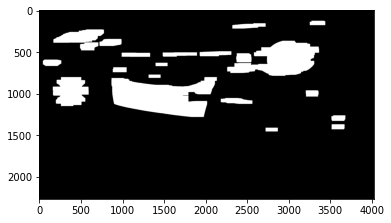

In [161]:

imagenes_cnt = []

for imagen in imagen_opening:
    
    img_erosion = cv.erode(imagen, kernel, iterations=7)
    img_dilation = cv.dilate(img_erosion, kernel, iterations=7)
    img_dilation = cv.dilate(img_dilation, np.ones((2,9), np.uint8), iterations=15)
    img_dilation = cv.dilate(img_dilation, kernel, iterations=5)



    contour,hier = cv.findContours(img_dilation,cv.RETR_CCOMP,cv.CHAIN_APPROX_SIMPLE)

    for cnt in contour:
        cv.drawContours(img_dilation,[cnt],0,255,-1)

    gray = cv.bitwise_not(img_dilation)



    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
    res = cv.morphologyEx(gray,cv.MORPH_OPEN,kernel)
    res = cv.bitwise_not(res)
    
    imagenes_cnt.append(res)

plt.imshow(imagenes_cnt[0], cmap="gray")


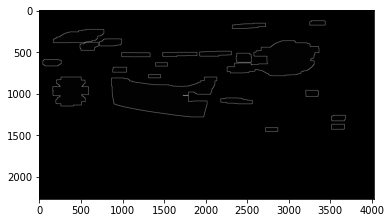

In [162]:

ll_cnts = []
ll_contornos = []

for imagen in imagenes_cnt:

    cnts,_=cv.findContours(cv.Canny(imagen,100,200),cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
    contornos =  cv.drawContours((imagen//255),cnts,-1,(100,100,100),2)
    ll_cnts.append(cnts)
    ll_contornos.append(contornos)
    
plt.imshow(ll_contornos[0], cmap="gray")

In [163]:

matricula_controno = []


for imagen in ll_cnts:
    
    contornos_millor=imagen[0]
    area_max=0
    for c in imagen:
        area = cv.contourArea(c)
        if area>area_max:#len(approx)==4 and area>4000:
            area_max=area
            contornos_millor=c
            x_esquerra,y_esquerra,largo,ancho = cv.boundingRect(c)
    
    
    matricula_controno.append(contornos_millor)
    


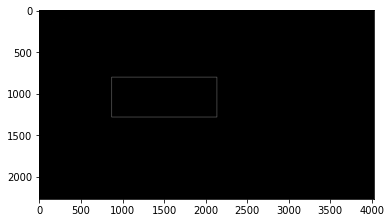

In [164]:

ll_matricula  = []
ll_coord = []
for i, imagen in enumerate(matricula_controno):

    epsilon = 0.02*cv.arcLength(imagen,True)
    approx = cv.approxPolyDP(imagen,epsilon,True)
    #print(len(approx))
    x,y,w,h = cv.boundingRect(approx)
    ll_coord.append((x,y,w,h))    
    img = ll_img[i]
    rec = cv.rectangle(img//255,(x,y),(x+w,y+h),(255,255,255),2)
    ll_matricula.append(rec)
    

plt.imshow(ll_matricula[0], cmap="gray")

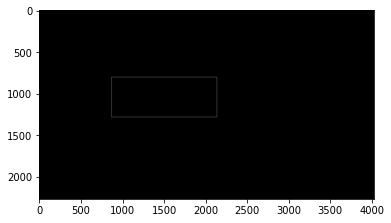

In [165]:
ll_controno_matricula  = []

for imagen in (ll_matricula):

    cnts_matricula,_=cv.findContours(cv.Canny(imagen,100,200),cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
    contornos_matricula =  cv.drawContours((imagen//255),cnts_matricula,-1,(100,100,100),2)
    ll_controno_matricula.append(contornos_matricula)
    
plt.imshow(ll_controno_matricula[0], cmap="gray")

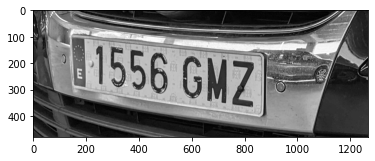

In [166]:
ll_recortadas = []

for  imagen, coord in zip(imagenes, ll_coord):
    
    imagen_recortada = imagen[coord[1]:coord[1]+coord[3],coord[0]:coord[0]+coord[2]]
    ll_recortadas.append(imagen_recortada)
    


plt.imshow(ll_recortadas[0],cmap="gray")   


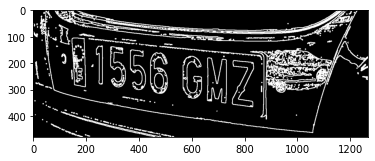

In [167]:
ll_contornos_pequeño = []
cnt_pequeño = []

for  imagen in ll_recortadas:
    bi_matricula1, bi_matricula = cv.threshold(imagen, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
    cnts_pequeño,_=cv.findContours(cv.Canny(bi_matricula,100,200),cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
    contornos_pequeño =  cv.drawContours((imagen//255),cnts_pequeño,-1,(100,100,100),2)
    ll_contornos_pequeño.append(contornos_pequeño)
    cnt_pequeño.append(cnts_pequeño)
    
plt.imshow(ll_contornos_pequeño[0], cmap="gray")
    





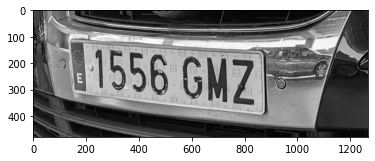

In [168]:
ll_rotated = []

for  imagen_recortada in ll_recortadas:
    
    gray = cv.bitwise_not(imagen_recortada)
    thresh = cv.threshold(gray, 0, 255,	cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
    thresh = 255 - thresh
    

    cnts,_=cv.findContours(cv.Canny(thresh,100,200),cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
    contornos_millor=cnts[0]
    area_max=0
    for c in cnts:
        area = cv.contourArea(c)
        if area>area_max:#len(approx)==4 and area>4000:
            area_max=area
            contornos_millor=c
            
    angle  = cv.minAreaRect(contornos_millor)[-1]

    if angle < -45:
        angle =  (90 + angle)
        
    
    else:
        angle = -( 90 - angle)
        

    (h, w) = imagen_recortada.shape[:2]
    center = (w // 2, h // 2)
    M = cv.getRotationMatrix2D(center, -angle, 1.0)
    rotated = cv.warpAffine(imagen_recortada, M, (w, h), flags=cv.INTER_CUBIC, borderMode=cv.BORDER_REPLICATE)
    
    ll_rotated.append(rotated)
 
plt.imshow(ll_rotated[0],cmap="gray")


In [169]:
import pytesseract
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract'

In [170]:
ll_text = []

for img_rotated in ll_rotated:
    text = pytesseract.image_to_string(img_rotated,config='--psm 11')
    ll_text.append(text)
    
    

print('PLACA: ',ll_text[0])

PLACA:  Mists:

—

Op cao

Za

@

11556 G

MZ

——



In [171]:
#solo funciono si detecta todos los elementos de la maricula, elimina los resultados incorecots que
#no son parte de la matricula pero por estar de fondo en la imgen el ocr lo detecta com un caracter
#elimina gran parte de estos caracterres erroneos
ll_resultat = []

for text in ll_text:
    count = 0
    ll = list(text.lower())
    if ' ' in  ll:
        ll.remove(" ")
    matricula = ""
    for letra in ll:
        if count < 4:
            if letra in ("1234567890"):
                count += 1
                matricula += letra
            else:
                count = 0
        else:
            if letra in ("wrtypsdfghjklzxcvbnm"):
                count += 1
                matricula += letra.upper()
    
    while len(matricula) < 7:
        matricula += " "     
    ll_resultat.append(matricula)

print(ll_resultat[0])

1155GMZ


In [172]:
dic_y = {'2': '8425MFR', '3':'2736LFT', '4':'5534HWK', '10':'1556GMZ', '11':'0182GLK', '12':'3044JMB', '13':'6929LKK',
  '14':'3660CRT', '15':'2344KJP', '16':'0907JRF', '17':'6401JBX', '18':'4674FHC', '20':'0012HLY', '21':'7713MFV'
  , '22':'8234MHS', '23':'1087MDR', '24':'3641JGY', '25':'4236KMV', '26':'5652JTM', '27':'0214JWP', '28':'6603DZM', 
  '29':'9058GMF', '30':'3467FPD', '32':'8798GYS', '33':'4840KHP', '34':'1062FNT', '35':'1943GFW', '36':'2376CHN'
  , '37':'2780KTT', '38':'2968FZC', '39':'2254HZL', '40':'3678GXN', '41':'3396GDF', '42':'5317JVM', '43':'4146HXM', 
  '44':'2304LSC', '45':'0424JLP', '46':'3044JMB', '47':'9575LCM', '48':'2354HKR'}

In [294]:
path = 'C:/Users/LENOVO/Documents/uni/4t/psiv/psiv2_matricules/Imatges'
nom_imagenes = os.listdir(path)
ll_y = []
ll_titulos = []

for titulo in nom_imagenes:
    
    if titulo.endswith('.jpg') or titulo.endswith('.jpeg'):
        ll_titulos.append(titulo)
        img =  cv.imread('Imatges/' + titulo)
        ll_y.append(img)
        
       

In [283]:
print(ll_titulos[13])

matricula_23.jpeg


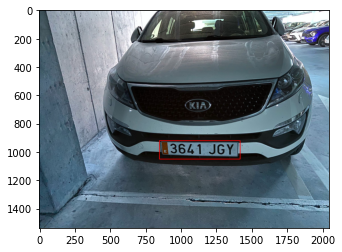

In [295]:

cv.rectangle(ll_y[14], (850,920), (1420, 1050), (255, 0, 0), 4)
plt.imshow(ll_y[14],cmap="gray")

In [281]:
dic_posicion_matricula = {'10': [(970,870), (1750, 1200)], '11':[(1050,950), (2000, 1300)], '12':[(1200,700), (2000, 1050)],
                          '13':[(500,800), (1450, 1200)], '14':[(800,1000), (1900, 1350)], '15':[(1200,900), (2000, 1150)]
                          ,'16':[(900,1200), (1900, 1700)], '17': [(550,1150), (1500, 1550)], '18':[(1400,900), (2200, 1100)],
                          '2':[(690,650), (1300, 900)], '20':[(770,900), (1500, 1050)], '21':[(750,850), (1350, 1000)],
                          '22':[(740,1000), (1420, 1120)], '23':[(650,940), (1420, 1100)], '24':[(850,920), (1420, 1050)]}

In [177]:
key = list(dic_y.keys())
key.sort()
ll_errores = []

for k, result in zip(key, ll_resultat):
    
    errores = 0
    for lletra_res, lletra_real in zip(result, dic_y[k]):
        if lletra_res != lletra_real:
            errores += 1
    ll_errores.append(errores)

print(ll_errores)

['1155GMZ', '182    ', '       ', '       ', '8366CRT', '4234KP ', '0907JRF', '7522227992292452', '4      ', '       ', '9912HL ', '8771MV ', '       ', '       ', '       ', '1236   ', '       ', '0214JWP', '6603DZMFTNNCR', '       ', '       ', '72     ', '9879GYS', '6484KHP', '1062L  ', '       ', '23440  ', '8278KTT', '47968ZC', '       ', '       ', '8367GXN', '       ', '       ', '1146   ', '       ', '       ', '3044   ', '8957LCM', '350    ']
[2, 7, 7, 7, 3, 5, 0, 7, 6, 7, 3, 5, 7, 7, 7, 4, 7, 0, 0, 7, 7, 7, 4, 4, 3, 7, 5, 4, 5, 7, 7, 4, 7, 7, 4, 7, 7, 3, 4, 7]


In [174]:
'''
im_floodfill = ((aux>2) * aux).copy()
 
h, w = aux.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv.floodFill(im_floodfill, mask, (0,0), 255)
 
# Invert floodfilled image
im_floodfill_inv = cv.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = aux | im_floodfill_inv
 
plt.imshow( im_out,cmap="gray")
--
imagen_final=img_gris*(im_out>200)
plt.imshow(imagen_final,cmap="gray")
--
imagen_recortada=imagen_final[y_esquerra:y_esquerra+ancho,x_esquerra:x_esquerra+largo]
plt.imshow(imagen_recortada,cmap="gray")
'''

'\nim_floodfill = ((aux>2) * aux).copy()\n \nh, w = aux.shape[:2]\nmask = np.zeros((h+2, w+2), np.uint8)\n \n# Floodfill from point (0, 0)\ncv.floodFill(im_floodfill, mask, (0,0), 255)\n \n# Invert floodfilled image\nim_floodfill_inv = cv.bitwise_not(im_floodfill)\n \n# Combine the two images to get the foreground.\nim_out = aux | im_floodfill_inv\n \nplt.imshow( im_out,cmap="gray")\n--\nimagen_final=img_gris*(im_out>200)\nplt.imshow(imagen_final,cmap="gray")\n--\nimagen_recortada=imagen_final[y_esquerra:y_esquerra+ancho,x_esquerra:x_esquerra+largo]\nplt.imshow(imagen_recortada,cmap="gray")\n'

https://es.stackoverflow.com/questions/141818/como-enderezo-una-imagen-en-python

https://pyimagesearch.com/2017/02/20/text-skew-correction-opencv-python/